In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
"""
OD_Matrix_pc_75.csv
population_pt_75.csv
OD_Matrix_pt_75.csv
population_pc_75.csv
population.csv
"""
percent_pop = "combined"
folder = "combined"
incubation = 15

melbourne_pc = pd.read_csv('data/'+folder+'/population_pc_'+percent_pop+'.csv', sep=',',header=None)
pop_pc       = melbourne_pc.values
pop_pc       = np.nan_to_num(pop_pc, copy = True)
pop_pc       = pop_pc.astype(int)

od_matrix_pc = genfromtxt('data/'+folder+'/OD_Matrix_pc_'+percent_pop+'.csv', delimiter=',')
od_matrix_pc = np.reshape(od_matrix_pc, (12,309,309))
od_matrix_pc = np.nan_to_num(od_matrix_pc, copy = True)
od_matrix_pc = od_matrix_pc.astype(int)

melbourne_pt = pd.read_csv('data/'+folder+'/population_pt_'+percent_pop+'.csv', sep=',',header=None)
pop_pt       = melbourne_pt.values
pop_pt       = np.nan_to_num(pop_pt, copy = True)
pop_pt       = pop_pt.astype(int)

od_matrix_pt = genfromtxt('data/'+folder+'/OD_Matrix_pt_'+percent_pop+'.csv', delimiter=',')
od_matrix_pt = np.reshape(od_matrix_pt, (12,309,309))
od_matrix_pt = np.nan_to_num(od_matrix_pt, copy = True)
od_matrix_pt = od_matrix_pt.astype(int)

#At this point only have 25% for pop and flow, now we scale them up


pop_pc = pop_pc*4
od_matrix_pc = od_matrix_pc*4

pop_pt = pop_pt*4
od_matrix_pt = od_matrix_pt*4

for i in range(1,12):
    pop_pc[i,:] = pop_pc[0,:]
    pop_pt[i,:] = pop_pt[0,:]

to_this_origin_pc   = np.sum(od_matrix_pc,axis = 1)
from_this_origin_pc = np.sum(od_matrix_pc,axis = 2)

to_this_origin_pt   = np.sum(od_matrix_pt,axis = 1)
from_this_origin_pt = np.sum(od_matrix_pt,axis = 2)

In [65]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import random
from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')

random.seed(30)

OD_id = [p for p in range (0,309)]

r = od_matrix_pc.shape[0]
n = pop_pc.shape[1]

initialInd = random.sample(OD_id,20)
initial = np.zeros(n)
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = incubation*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run SIR-mobility-mode.py

res = {}
iterations = 3000
inf = 10

res['baseline'] = sir(model,pop_pc,od_matrix_pc,pop_pt,od_matrix_pt,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:54: RuntimeWarning: invalid value encountered in true_divide
  realflow_pc = realflow_pc / realflow_pc.sum(axis=2)[:,:, np.newaxis]
/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:57: RuntimeWarning: invalid value encountered in true_divide
  realflow_pt = realflow_pt / realflow_pt.sum(axis=2)[:,:, np.newaxis]


In [51]:
total_infect = np.sum(res['baseline'][4]) + np.sum(res['baseline'][5])
total_infect

3152901.1377412975

In [53]:
base_case = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [56]:
_i_go_work_50 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [59]:
_i_work_0 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [62]:
sc = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [66]:
com= res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [4]:
no_mobility_7 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

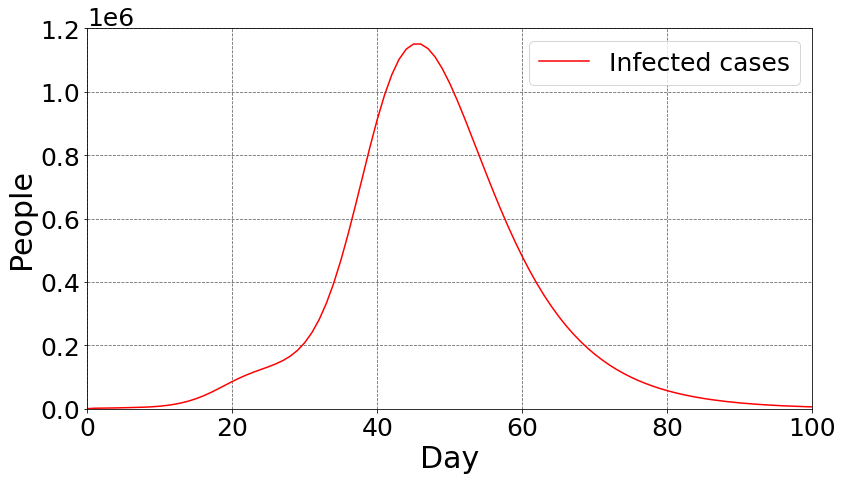

In [26]:
def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0,1200000,10000)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='red',label = 'Infected cases')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')

    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    #plt.title('7 days incubation ',fontsize=16)
    plt.legend(loc=1, prop={'size':25})
   
    #plt.get_offset_text(axis="y").set_fontsize(120)
    plt.savefig( '/Users/cptnemo2005/new_results/mobility'+ '.jpg')
    
sir_plot_r(base_case)

In [43]:
mobility_7    = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [40]:
mobility_5    = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [46]:
mobility_9    = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [58]:
no_mobility_7 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [52]:
no_mobility_9 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [17]:
results = '/Users/cptnemo2005/Desktop/SEIR/results/'

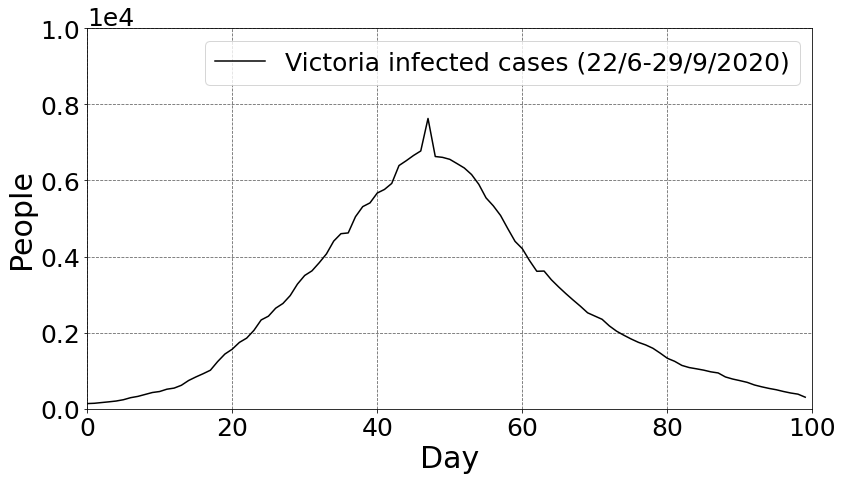

In [29]:
real_data = np.array([
  137,145,164,183,204,238,292,326,377,428,454,515,
544,618,744,837,922,1014,1241,1439,1565,1745,1857,2061,2335,2434,2644,2768,2975,3277,3504,3625,3838,4071,4407,4602,
    4622,5048,5313,5411,5670,5765,5923,6393,6520,6657,6776,7630,6630,6608,6556,6444,6329,6157,5900,5543,5334,5081,
    4734,4400,4208,3894,3614,3620,3392,3204,3027,2859,2697,2523,2437,2352,2178,2039,1933,1835,1747,1679,1591,1464,1327
    ,1248,1140,1084,1051,1016,971,942,837,782,740,695,626,578,536,501,455,415,385,305
])

from datetime import date, timedelta

# from Jun 2nd to Sep 29th

# this will give you a list containing all of the dates


def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0,10000,100)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='black',label='Victoria infected cases (22/6-29/9/2020)')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':25})
    
    plt.savefig('/Users/cptnemo2005/new_results/' + 'Victoria_infected_case_Jun_Sep.jpg')
    
sir_plot_r(real_data) 

In [34]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

EPSIM_sc_wfh         = episim_data['sc_wfh']
EPSIM_sc             = episim_data['sc']
EPSIM_base           = episim_data['bc']
EPSIM_FROM_HOME      = episim_data['wfh']
EPSIM_50_FROM_HOME   = episim_data['wfh_50']

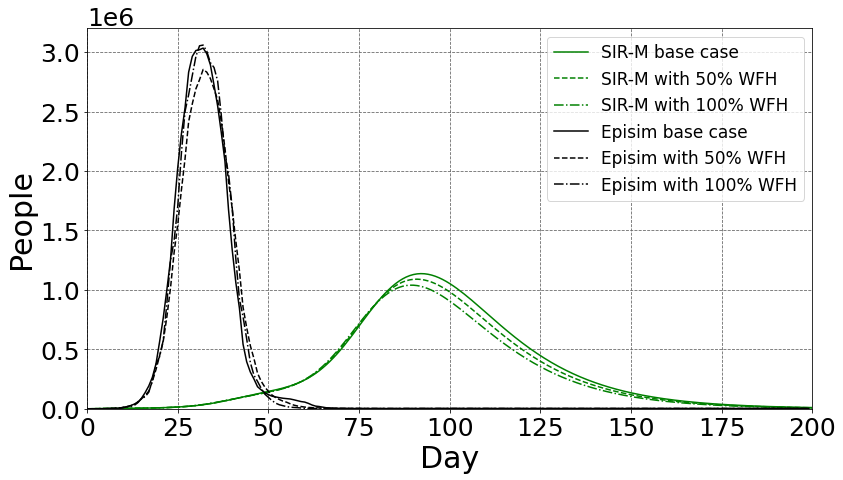

In [63]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,200,1)
    plt.ylim(0, 3200000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='g',label='SIR-M base case')
    plt.plot(y, color='g',label='SIR-M with 50% WFH',linestyle='--')
    plt.plot(z, color='g',label='SIR-M with 100% WFH',linestyle='-.')
    plt.plot(a, color='k',label='Episim base case')
    plt.plot(b, color='k',label='Episim with 50% WFH',linestyle='--')
    plt.plot(c, color='k',label='Episim with 100% WFH',linestyle='-.')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':17})
    
    plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-work.jpg')
    
sir_plot_r(base_case,
          _i_go_work_50,
          _i_work_0,
          EPSIM_base,
          EPSIM_FROM_HOME,
          EPSIM_50_FROM_HOME) 

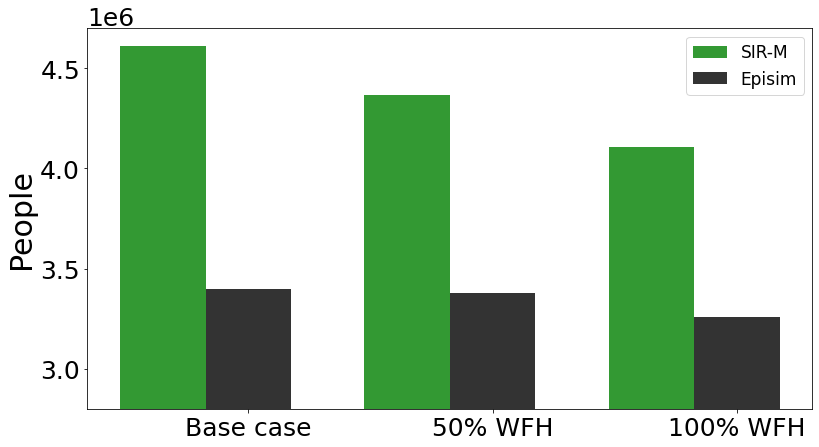

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
SIR_WITH_MOBILITY = (4613232,4366291,4108778)
EPISIM            = (3395700,3379600,3257900)

# create plot
plt.figure(figsize=(13,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, SIR_WITH_MOBILITY, bar_width,
                alpha=opacity,
                color='g',
                label= 'SIR-M')

rects2 = plt.bar(index + bar_width, EPISIM, bar_width,
                alpha=opacity,
                color='black',
                label='Episim')

#plt.xlabel('Policies',fontsize=13)
plt.ylabel('People',fontsize=30)
plt.ylim(2800000, 4700000,1)
plt.xticks(index + bar_width, ('Base case','50% WFH','100% WFH'))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.legend(loc=1, prop={'size':17})

#plt.legend()
plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-work-total.jpg')
#plt.tight_layout()
plt.show()

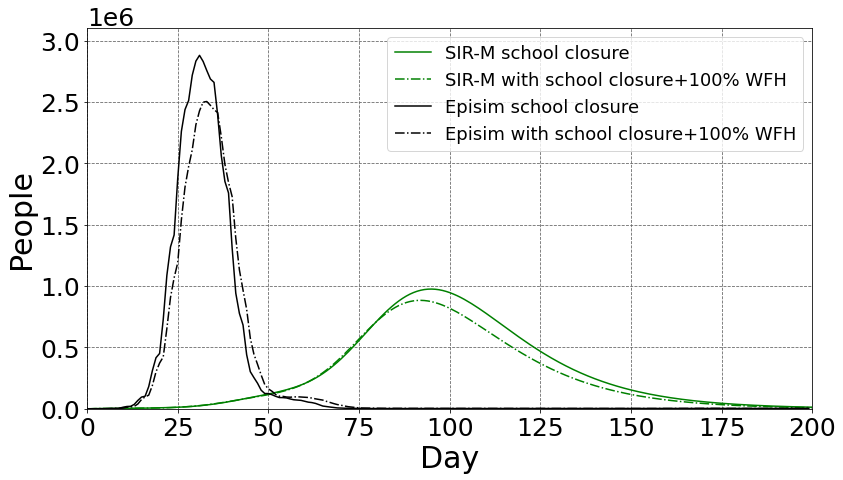

In [70]:
def sir_plot_r(x,y,a,b):
    plt.figure(figsize=(13,7))
    plt.xlim(0,200,1)
    plt.ylim(0, 3100000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='g',label='SIR-M school closure')
    plt.plot(y, color='g',label='SIR-M with school closure+100% WFH',linestyle='-.')

    plt.plot(a, color='k',label='Episim school closure')
    plt.plot(b, color='k',label='Episim with school closure+100% WFH',linestyle='-.')

    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':18})
    
    plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-policies.jpg')
    
sir_plot_r(
          sc,
          com,
            EPSIM_sc,
        EPSIM_sc_wfh ) 

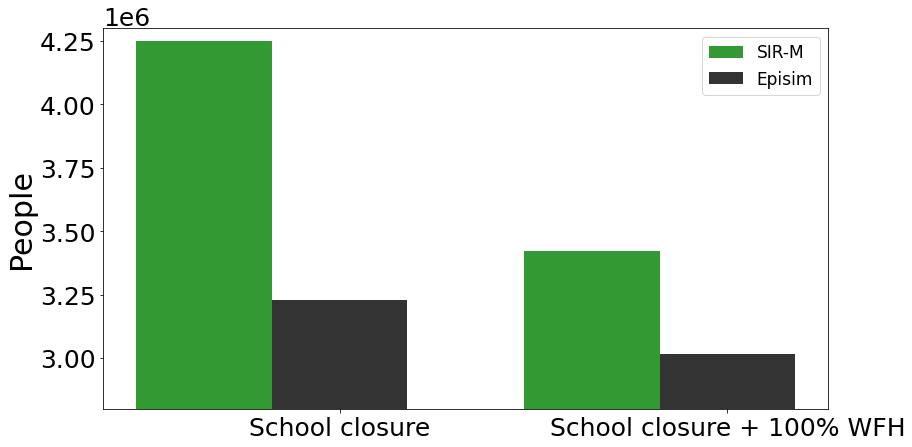

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
SIR_WITH_MOBILITY = (4248991,3420385)
EPISIM            = (3229900,3017900)

# create plot
plt.figure(figsize=(13,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, SIR_WITH_MOBILITY, bar_width,
                alpha=opacity,
                color='g',
                label= 'SIR-M')

rects2 = plt.bar(index + bar_width, EPISIM, bar_width,
                alpha=opacity,
                color='black',
                label='Episim')

#plt.xlabel('Policies',fontsize=13)
plt.ylabel('People',fontsize=30)
plt.ylim(2800000, 4300000,1)
plt.xticks(index + bar_width, ('School closure','School closure + 100% WFH'))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.legend(loc=1, prop={'size':17})

#plt.legend()
plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-policies-total.jpg')
#plt.tight_layout()
plt.show()